# Medical Insurance Portfolio Project

## Introduction
In this project I will be analyzing a CSV file containing data on patients and their insurance costs using python fundamentals. Initially I wanted to run some t-tests, an ANOVA test, and a linear regression model. However, upon further examination of this data, it did not meet the assumptions for many of these tests.

### Avoiding Assumption Violations

The data for insurance cost is unimodal and right-skewed, with many outliers in the upper limits. While log-transformations can typically be used to help "normalize" a data set, this did not work well enough to call the data "normally distributed" or to allow tests such as t-tests, ANOVA, and linear regression to be carried out.

Standardizing the data with included outliers also did not transform the data enough to justify calling the data "normally distributed". Removing the outliers removed almost all of the smokers from the dataset, causing the data to no longer be representative of the population.

Nonparametric tests could most likely be run with success, however, I have not yet been trained in nonparametric testing and interpretation, and have not carried out any nonparametric tests in this project. If you are interested in seeing the initial analysis for the normality of the data, or interested in seeing the results of the transformations, please see the last section of this notebook titled "Analyzing Assumptions of Normality".

I determined that I could transform some of the quantitative variables into categorical variables and groups so that the underlying trends could be analyzed using chi-squared tests (as the data did meet the assumptions for this one test). This may provide some insight for future research so that when an appropriate sample has been collected, the trends can be analyzed in more detail.


Throughout this project we will analyze the data in three main ways:
   
 1. by sex (gender)
 2. by region
 3. by bmi
 
Let's get started by looking at some summary statistics for our data.


## Exploratory Data Analysis

In [1]:
#importing necessary libraries
import os
import pandas as pd
import numpy as np

#checking current directory
cwd = os.getcwd()
#print("Current Working Directory: {0}".format(cwd))

#importing data
data = pd.read_csv("insurance.csv")

#viewing first few lines of data
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
#summary statistics for entire data set

print(round(data.describe(),2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


As you can see, the variables "sex", "smoker", and "region" were not inculded with our summary statistics as those are categorical variables. We will analyze those variables in more detail momentarily, but for now let's look at our quantitative variables.


From these statistics, we can see that our dataset has a total number of 1338 data points.

The average age of our participants was 39.21 with a standard deviation of 14.05 years.

The average bmi of our participants was 30.66 with a standard deviation of 6.10.

The average number of children our participants had was 1.09, with a standard deviation of 1.21.

The average charges for insurance were 13,270.42 with a standard deviation of 12,110.01.


This gives us a good general idea of who we have collected data on, but to help complete the picture, lets further analyze our categorical variables.


### Looking at Categorical Variables

In [3]:
#converting categorical data columns to pandas "Categorical" data type
data["sex"]=pd.Categorical(data["sex"])
data["smoker"]= pd.Categorical(data["smoker"])

#getting category codes for analysis
data["sex_coded"]=data["sex"].cat.codes
data["smoker_coded"] = data["smoker"].cat.codes

#viewing new columns in dataset
print(data.head())

   age     sex     bmi  children smoker     region      charges  sex_coded  \
0   19  female  27.900         0    yes  southwest  16884.92400          0   
1   18    male  33.770         1     no  southeast   1725.55230          1   
2   28    male  33.000         3     no  southeast   4449.46200          1   
3   33    male  22.705         0     no  northwest  21984.47061          1   
4   32    male  28.880         0     no  northwest   3866.85520          1   

   smoker_coded  
0             1  
1             0  
2             0  
3             0  
4             0  


As we can see, we now have new columns in the dataset that have coded the variables for sex, smoker-status, and region, respectively.

Codes are as follows:

1. For "sex":
    - 0: Female
    - 1: Male

2. For "smoker":
    - 0: Non-Smoker
    - 1: Smoker


To find the proportion of our participants who are male, we can simply add up the total for the "sex_coded" column, and divide by the total length of our dataset. 

Similarly, we can find the proportion of our participants who are smokers the same way.

In [4]:
#finding total proportion of male and female participants, rounded to two decimal points
male_prop = round((sum(data["sex_coded"])/len(data)), 2)
print("The proportion of males in our dataset is " + str(male_prop))


female_prop = 1 - male_prop
print("The proportion of females in our dataset is " + str(female_prop))


The proportion of males in our dataset is 0.51
The proportion of females in our dataset is 0.49


These proportions are close enough to the gender distribution of the general population to be considered representative.

In [5]:
#finding total proportion of smokers and non-smokers, rounded to two decimal points
smoker_prop = round((sum(data["smoker_coded"])/len(data)), 2)
print("The proportion of smokers in the dataset is " + str(smoker_prop))

non_smoker_prop = 1- smoker_prop
print("The proportion of non-smokers in the dataset is " + str(non_smoker_prop))

The proportion of smokers in the dataset is 0.2
The proportion of non-smokers in the dataset is 0.8


The proportion of smokers to non-smokers is in line with the general population proportion of total smokers from the year 2005 ([CDC data](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm)), however, according to the CDC, the total proportion of smokers has decreased to around 14 percent (as of the year 2019). 

It is unclear what year this data was collected (as the data was provided by Codecademy as a csv file with no additional information), so, for the purposes of this project we will be operating under the assumptions that the data IS representative of general population proportion of smokers.



Now we can deal with the "region" variable. We can find the total proportion of participants from the various regions by finding counts for that region and then dividing by the length of our data set.

In [6]:
#finding counts for the regions, and converting to proportions
counts= data["region"].value_counts()
proportions = counts/len(data)
print(round(proportions, 2))

southeast    0.27
northwest    0.24
southwest    0.24
northeast    0.24
Name: region, dtype: float64


As you can see from the above proportions, it looks as though our participants are relatively evenly distributed between the regions, with the Southeast having the most participants by 3 percentage points, or a proportion of 0.03.

Given the total number of participants (1338), we will assume that the distribution of our sample is representative of the population.

Now that we have a better understanding of our data and the distributions of our variables, we can begin to analyze the data in detail.


## 1. Does Gender Influence Insurance Costs?

In [7]:
# splitting data into males and females, creating label variable
male_data = data.loc[data["sex"]=="male"]["charges"]
female_data= data.loc[data["sex"]=="female"]["charges"]
genders = ["Male", "Female"]

#getting summary statistics for male & female groups
print(round(male_data.describe(),2),round(female_data.describe(),2))


count      676.00
mean     13956.75
std      12971.03
min       1121.87
25%       4619.13
50%       9369.62
75%      18989.59
max      62592.87
Name: charges, dtype: float64 count      662.00
mean     12569.58
std      11128.70
min       1607.51
25%       4885.16
50%       9412.96
75%      14454.69
max      63770.43
Name: charges, dtype: float64


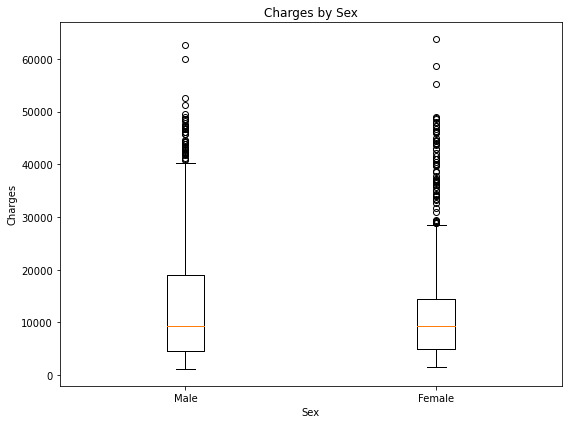

In [64]:
# importing visual and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon

#creating boxplots by gender
plt.figure(figsize = (8,6))
plt.boxplot([male_data, female_data], labels = genders)
plt.title("Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.tight_layout()
plt.savefig("Cost Distribution by Sex")

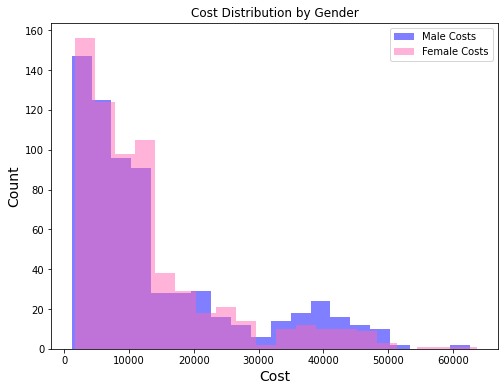

In [10]:
# creating overlapping histogram for gender
plt.figure(figsize = (8,6))
plt.hist(male_data, bins = 20, alpha=0.5, label = "Male Costs", color = "blue")
plt.hist(female_data, bins = 20, alpha= 0.5, label = "Female Costs", color = "hotpink")
plt.xlabel("Cost", size =14)
plt.ylabel("Count", size =14)
plt.title("Cost Distribution by Gender")
plt.legend(loc="upper right")
plt.savefig("Cost Distribution by Gender")

Overall, it looks as though the average costs of insurance for men and women are about the same, although from the boxplots it looks as though men have a larger inner quartile range, as well as a larger standard deviation for their insurance costs.

To further analyze the relationship between insurance cost and gender, we will convert our "charges" variable to a categorical variable that states whether the charges are "above" or "below" the mean. We will then create a contingency table for chi squared analysis.


In [65]:
#Converting data to contingency table for analysis

#creating empty list
meanstatus = []

#for loop that iterates through the data in charges and assigns a category based upon whether the data is above 
#or below the mean

for number in data["charges"]:
    result = ""
    if number > np.mean(data["charges"]):
        result = "above"
        meanstatus.append(result)
    elif number == np.mean(data["charges"]):
        result = "equal"
        meanstatus.append(result)
    elif number < np.mean(data["charges"]):
        result = "below"
        meanstatus.append(result)
        
#adding a column to our original dataset that contains the "status" of the charges        
data["meanstatus"] = meanstatus


#creating a table of counts using pandas crosstab
table = pd.crosstab(data["meanstatus"], data["sex"])


print(table)

sex         female  male
meanstatus              
above          199   221
below          463   455



### Checking Assumptions
1. Are observations independent and randomly sampled?
   - as this data was provided by Codecademy with no information on how the data was collected, we will assume that the observations are independent and randomly sampled
   
2. The categories are mutually exclusive,
    - given that someone cannot be both male and female or simultaneously both above and below the mean cost of insurance, yes the categories are mutually exclusive.
    
3. The groups are independent.
    - yes, the groups are independent.
    
All assumptions are met and we can continue with the test!

### Hypotheses

1. H0: There is no relationship between the categorical variables
2. HA: There IS a relationship between the categorical variables

In [66]:
#importing chi2 test
from scipy.stats import chi2_contingency

# running the chi2 test
chi2, pval, dof, expected = chi2_contingency(table)

#printing results so they look nice
print("----------------------------------")
print("Expected Table")
print("----------------------------------")
print(np.round(expected, 0))
print("----------------------------------")
print("Data Table")
print("----------------------------------")
print(table)
print("----------------------------------")
print("Test Statistic: " + str(chi2))
print("P-Value: " + str(pval))
print("----------------------------------")
alpha = 0.05
if pval < alpha:
    print("Reject Null Hypothesis")
else: 
    print("Fail to Reject Null Hypothesis")



----------------------------------
Expected Table
----------------------------------
[[208. 212.]
 [454. 464.]]
----------------------------------
Data Table
----------------------------------
sex         female  male
meanstatus              
above          199   221
below          463   455
----------------------------------
Test Statistic: 0.9569943857787656
P-Value: 0.32794530362605323
----------------------------------
Fail to Reject Null Hypothesis


So, does gender influence insurance costs? According to our chi squared analysis we Fail to Reject the Null Hypothesis of "no relationship between categorical variables", so for this resarch question, with our data, the answer is no! 

For this data, gender does not significantly influence whether your insurance cost is above or below the mean.



## 2. Does Insurance Cost Vary Significantly By Region?

In [13]:
#finding unique values for region
regionvalues = list(data["region"].unique())
print(regionvalues)

['southwest', 'southeast', 'northwest', 'northeast']


In [67]:
# creating seperate lists of prices by region for histograms and boxplots
southwest_costlist = data.loc[data["region"]=="southwest"]["charges"]
southeast_costlist = data.loc[data["region"]=="southeast"]["charges"]
northwest_costlist = data.loc[data["region"]=="northwest"]["charges"]
northeast_costlist = data.loc[data["region"]=="northeast"]["charges"]

Now that we have lists of costs, filtered by region, we can create histograms and box plots to help visually compare the regions on cost of insurance.

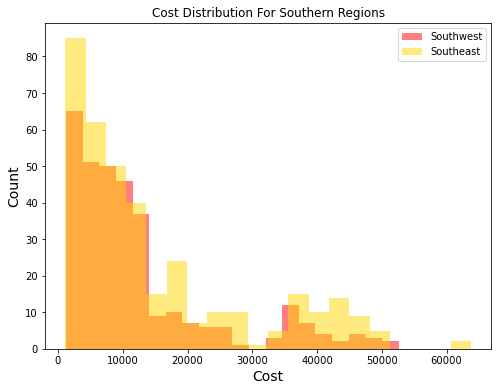

In [68]:

#creating overlapping histograms for southern regions, would do all regions but that made it hard to read or see
#the overlap

plt.figure(figsize = (8,6))
plt.hist(southwest_costlist, bins=20, alpha=0.5, label = "Southwest", color = "red")
plt.hist(southeast_costlist, bins=20, alpha=0.5, label = "Southeast", color = "gold")
plt.xlabel("Cost", size =14)
plt.ylabel("Count", size =14)
plt.title("Cost Distribution For Southern Regions")
plt.legend(loc="upper right")
plt.savefig("Cost Distributions for Southern Regions, fig 1")


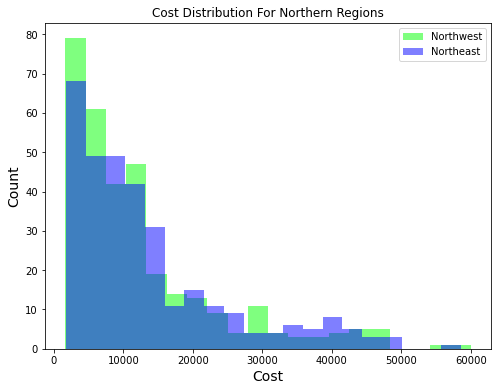

In [70]:
#creating overlaping histogram for Northern Regions

plt.figure(figsize = (8,6))
plt.hist(northwest_costlist, bins = 20, alpha=0.5, label = "Northwest", color = "lime")
plt.hist(northeast_costlist, bins = 20, alpha= 0.5, label = "Northeast", color = "blue")
plt.xlabel("Cost", size =14)
plt.ylabel("Count", size =14)
plt.title("Cost Distribution For Northern Regions")
plt.legend(loc="upper right")
plt.savefig("Cost Distribution for Northern Regions")

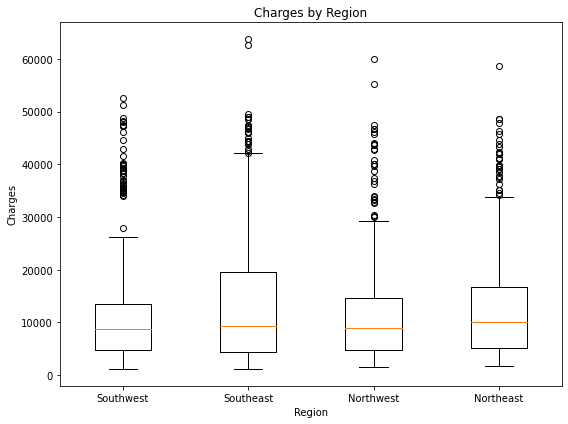

In [71]:
#creating list of labels for boxplots
names = ["Southwest", "Southeast", "Northwest", "Northeast"]

#creating boxplots by region
plt.figure(figsize = (8,6))
plt.boxplot([southwest_costlist, southeast_costlist, northwest_costlist, northeast_costlist], labels = names)
plt.title("Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.tight_layout()
plt.savefig("Cost Distribution for All Regions, Boxplots")

Looking at the large sections of the histograms that overlap eachother, it would seem (visually at least) that there is not a significant difference in average insurance cost by region. The side-by-side boxplots seem to confirm this by showing that the medians of each region are about equal. However, it would seem the inner quartile ranges and standard deviations vary significantly by region and this might affect our overall result.

To more fully test this theory we will convert our data into counts and analyze with a Chi Squared test.

### Hypotheses

1. H0: There is no interaction between our categorical variables
2. HA: There is an interaction between our categorical variables

### Checking Assumptions
1. Are observations independent and randomly sampled?
    - as this data was provided by Codecademy with no information on how the data was collected, we will assume that the observations are independent and randomly sampled
    
2. The categories are mutually exclusive,
    - given that someone cannot be from multiple regions or simultaneously both above and below the mean cost of insurance, yes the categories are mutually exclusive.
    
3. The groups are independent.
    - yes, the groups are independent.
    
All assumptions are met and we can continue with the test!


In [18]:
#getting counts
table2 = pd.crosstab(data["meanstatus"], data["region"])
print(table2)

region      northeast  northwest  southeast  southwest
meanstatus                                            
above             109         96        130         85
below             215        229        234        240


In [72]:
# running the chi2 test
chi2_2, pval_2, dof_2, expected_2 = chi2_contingency(table2)

#printing results so they look nice
print("----------------------------------")
print("Expected Table")
print("----------------------------------")
print(np.round(expected_2, 0))
print("----------------------------------")
print("Data Table")
print("----------------------------------")
print(table2)
print("----------------------------------")
print("Test Statistic: " + str(chi2_2))
print("P-Value: " + str(pval_2))
print("----------------------------------")
alpha = 0.05
if pval_2 < alpha:
    print("Reject Null Hypothesis")
else: 
    print("Fail to Reject Null Hypothesis")



----------------------------------
Expected Table
----------------------------------
[[102. 102. 114. 102.]
 [222. 223. 250. 223.]]
----------------------------------
Data Table
----------------------------------
region      northeast  northwest  southeast  southwest
meanstatus                                            
above             109         96        130         85
below             215        229        234        240
----------------------------------
Test Statistic: 8.578144778265852
P-Value: 0.035458731158705736
----------------------------------
Reject Null Hypothesis


At a significance level of 0.05, we have enough evidence to reject our Null Hypothesis! This means that despite how the data may superficially appear, there IS an interaction between our categorical variables.

### Analyzing trends

In [73]:
#printing table of proportions for easier analysis

table2_asprop = table2/len(data)

print(round(table2_asprop,2))

region      northeast  northwest  southeast  southwest
meanstatus                                            
above            0.08       0.07       0.10       0.06
below            0.16       0.17       0.17       0.18


The region with the highest proportion of participants with insurance costs above the mean is the Southeast.
The region with the highest proportion of participants with insurance costs below the mean is the Southwest.

Both the Northwest and the Northeast are approximately equally distributed between above (0.07, 0.08, repectively) and below (0.17, 0.16, repectively) the mean.

It would appear that our largest trends lie in the Southern regions. This should be further analyzed using another sample, preperably one that is normally distributed so we can run an ANOVA test of means for the regions. For now, however, it would appear that if you live in the Southeast, your insurance is more likely to be above the mean, and if you live in the Southwest, your insurance is more likely to be below the mean.

## 3. Does BMI Influence Insurance Cost?

Let's take a look at our data by plotting a scatterplot of Insurance cost by BMI.

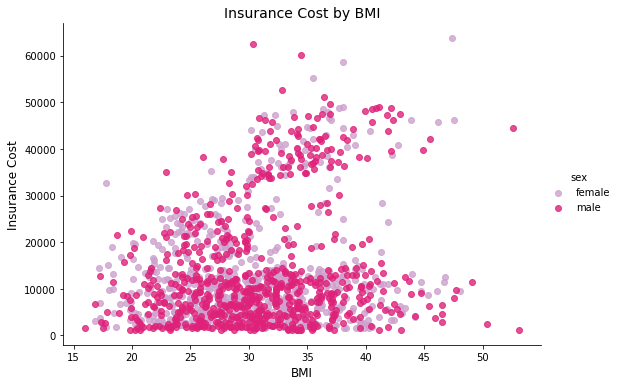

In [32]:
#importing seaborn
import seaborn as sns

sns.lmplot(x="bmi", y = "charges", hue="sex", fit_reg=False, data=data, palette="PuRd",height = 5, aspect = 1.5)
plt.xlabel("BMI", fontsize = 12)
plt.ylabel("Insurance Cost", fontsize =12)
plt.title("Insurance Cost by BMI", fontsize = 14)
plt.show()

As we can see from the above scatterplot, and confirming our conclusion in section 1, Males and Females seem to be approximately evenly distributed  across both bmi and insurance cost. Becuase there is not any underlying trend in  relation to gender and insurance cost, we can analyze this data in one piece.

The CDC breaks BMI into the following ([categories](https://www.cdc.gov/healthyweight/assessing/index.html)),

1. BMI is less than 18.5: underweight range.
2. 18.5 to 24.9: normal or Healthy Weight range.
3. 25.0 to 29.9: overweight range.
4. 30.0 or higher: obese range.

Additionally, ([Medline.gov](https://medlineplus.gov/ency/patientinstructions/000348.htm)) provides these additional categories defining subclases of obesity by relative disease risk:

1. 30.0 to 34.9: Class 1 (low-risk) obesity
2. 35.0 to 39.9:Class 2 (moderate-risk) obesity
3. Greater than or Equal to 40.0: Class 3 (high-risk) obesity

According to the summary statistics that we ran at the beginning, the lowest BMI  in our dataset was 15.96 and the maximum was 53.13 Our data's range covers all of these categories so we will divide our data accordingly by using the following categories:

1. Normal or Underweight 
    - (we have combined Normal or Underweight into one category so that we have at least 10 observations per group in order to run a chi-squared test)
2. Overweight
3. Class 1
4. Class 2
5. Class 3

In [41]:
#adding BMI category column
bmi_cats = []

#selecting values/defining categories
for num in data["bmi"]:
    category=""
    if num < 18.5:
        category="Normal or Underweight"
    elif 18.5 <= num <25:
        category= "Normal or Underweight"
    elif 25.0<= num <30:
        category = "Overweight"
    elif 30.0 <= num <35:
        category = "Class 1"
    elif 35.0 <= num < 40:
        category = "Class 2"
    elif num >= 40.00:
        category = "Class 3"
    else:
        category = "Other"
    bmi_cats.append(category)
    
data["bmi_category"] = bmi_cats

print(data.head())

   age     sex     bmi  children smoker     region      charges  sex_coded  \
0   19  female  27.900         0    yes  southwest  16884.92400          0   
1   18    male  33.770         1     no  southeast   1725.55230          1   
2   28    male  33.000         3     no  southeast   4449.46200          1   
3   33    male  22.705         0     no  northwest  21984.47061          1   
4   32    male  28.880         0     no  northwest   3866.85520          1   

   smoker_coded meanstatus           bmi_category  
0             1      above             Overweight  
1             0      below                Class 1  
2             0      below                Class 1  
3             0      above  Normal or Underweight  
4             0      below             Overweight  


In [42]:
#creating frequency table

bmi_table = pd.crosstab(data["meanstatus"], data["bmi_category"])
print(bmi_table)

bmi_category  Class 1  Class 2  Class 3  Normal or Underweight  Overweight
meanstatus                                                                
above             123       86       28                     73         110
below             268      139       63                    172         276


### Hypotheses for Chi-Squared test
1. H0: There is no relationship between the categorical variables
2. HA: There is a relationship between the categorical variables

### Checking Assumptions
1. Are observations independent and randomly sampled?
   - as this data was provided by Codecademy with no information on how the data was collected, we will assume that the observations are independent and randomly sampled
2. The categories are mutually exclusive,
    - given that someone cannot be in multiple bmi categories or both above and below the mean cost of insurance, yes the categories are mutually exclusive.
3. The groups are independent.
    - yes, the groups are independent.
    
All assumptions are met and we can continue with the test!

In [74]:
# running the chi2 test
chi2_3, pval_3, dof_3, expected_3 = chi2_contingency(bmi_table)

#printing results so they look nice
print("----------------------------------")
print("Expected Table")
print("----------------------------------")
print(np.round(expected_2, 0))
print("----------------------------------")
print("Data Table")
print("----------------------------------")
print(table2)
print("----------------------------------")
print("Test Statistic: " + str(chi2_2))
print("P-Value: " + str(pval_2))
print("----------------------------------")
alpha = 0.05
if pval_2 < alpha:
    print("Reject Null Hypothesis")
else: 
    print("Fail to Reject Null Hypothesis")



----------------------------------
Expected Table
----------------------------------
[[102. 102. 114. 102.]
 [222. 223. 250. 223.]]
----------------------------------
Data Table
----------------------------------
region      northeast  northwest  southeast  southwest
meanstatus                                            
above             109         96        130         85
below             215        229        234        240
----------------------------------
Test Statistic: 8.578144778265852
P-Value: 0.035458731158705736
----------------------------------
Reject Null Hypothesis


With a significance level of 0.05, we have enough evidence to reject the null hypothesis of no relationship between categorical variables.

Let's look at our data trends by looking at a proportion table of our data.

In [46]:
prop_bmi = bmi_table/len(data)
print(round(prop_bmi,2))

bmi_category  Class 1  Class 2  Class 3  Normal or Underweight  Overweight
meanstatus                                                                
above            0.09     0.06     0.02                   0.05        0.08
below            0.20     0.10     0.05                   0.13        0.21


The category with the highest proportion of data above the mean is the Class 1 Obesity category.
The category with the highest proportion of data below the mean is the Overweight category.

Now the BMI measurement has been faulted time and time again for mis-labeling athletes as "overweight" due to their muscle mass or labeling those who are "skinny-fat" due to an eating disorder or lack of activity as either normal or underweight. Because no additional information was collected on our participants (information such as muscle mass, water weight %, or body fat %), we are stuck with this rather iffy measurement of body classification. This makes analyzing the trends more difficult as we cannot determine the exact factor that separates someone from being healthy and in the overweight category (like an athlete) or someone who is unhealthy and in the normal category.

However, according to this data, there is an underlying trend that deserves some attention. It would seem that your insurance cost is more likely to be above the mean if you are Class 1 Obese, while if you are just Overweight your insurance cost is more likely to be below the mean. 

This seems counterintuitive, as we might assume that the lowest cost of insurance would be in the "Normal or Underweight" category. This could be due to many factors or interactions (e.g. bmi could increase as you get older, or increase if you have had children) and is in need of further research.

Further research is recomended for these trends and interactions with additional variables such as body fat % and muscle mass to be collected on the new sample so that the trend can be isolated and analyzed with more robust units of measurement. Additionally, it would be wise to ensure robust sampling methods and correct study design to eliminate unnecessary outliers and increase normality of the data so that a multiple regression model could be built to analyse the interactions between these variables.

## Conclusion

Gender by itself did not have any influence on whether insurance cost was above or below the mean. Both region and bmi, however, did have an influence on whether insurance cost was above or below the mean. More research is needed to explore these relationships in more detail and to  explore potential interactions between variables (age:bmi, number of children:bmi, etc.) 

Future researchers will need to be vigilant in study design and sample collection to ensure they collect an appropriate (normally distributed and representative) sample for various testing purposes. Additionally, future researchers might want to consider collecting data on additional variables related to BMI such as body fat %, muscle %, and water %, in order to have more robust statistics on health and body composition rather than relying on BMI alone.


# Analyzing Assumptions of Normality

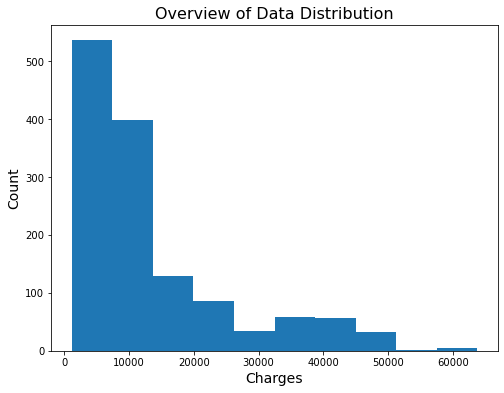

In [83]:
#plotting histogram of "charges" to see overall distribution of data
from matplotlib.pyplot import figure

figure(figsize=(8,6))
plt.hist(data["charges"])
plt.title("Overview of Data Distribution", fontsize =16)
plt.xlabel("Charges", fontsize = 14)
plt.ylabel("Count", fontsize= 14)
plt.show()

As we can see from the above histogram, the data is not normally distributed. The data is unimodal and right-skewed. We can attempt a log transformation of "charges" to see if this helps normalize the data.

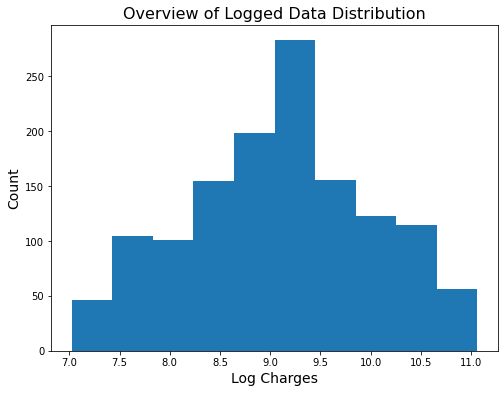

In [97]:
#adding a column for the log of charges
data["log_charges"]=np.log(data.charges)

#plotting a histogram of the log of charges

figure(figsize=(8,6))
plt.hist(data["log_charges"])
plt.title("Overview of Logged Data Distribution", fontsize =16)
plt.xlabel("Log Charges", fontsize = 14)
plt.ylabel("Count", fontsize= 14)
plt.show()

At first glance the data does appear to be "normally distributed" enough to perform linear regression. However, after performing linear regression and then checking our assumptions of the residuals being normally distributed and the assumption of homoscedasticity, we can see that the data clearly violate those assumptions.


                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     516.0
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           7.48e-97
Time:                        14:01:03   Log-Likelihood:                -1567.3
No. Observations:                1338   AIC:                             3139.
Df Residuals:                    1336   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7442      0.063    122.272      0.0

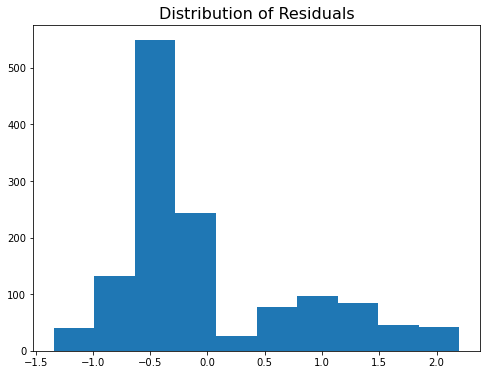

In [100]:
#importing linear regression libraries
import statsmodels.api as sm

#creating a simple model
model = sm.OLS.from_formula("log_charges ~ age", data = data)

results = model.fit()

print(results.summary())

#finding fitted values and residuals
fitted = results.predict(data)
residuals = data.log_charges - fitted

#checking normality of residuals
figure(figsize=(8,6))
plt.hist(residuals)
plt.title("Distribution of Residuals", fontsize =16)
plt.show()

As we can see the residuals are not normally distributed, which violates the assumption that the residuals are normally distributed.

If we check the assumption for homoscedasticity, we will see that assumption is also violated.


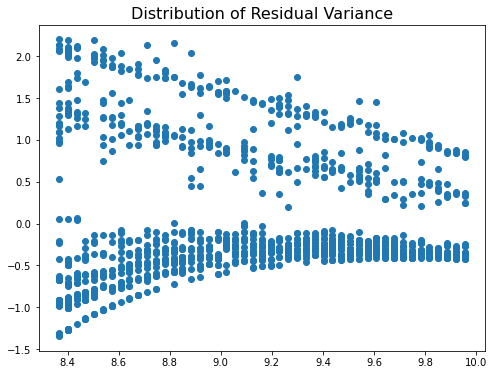

In [101]:
#checking homoscedasticity (the residuals have equal variation)
figure(figsize=(8,6))
plt.scatter(fitted, residuals)
plt.title("Distribution of Residual Variance", fontsize =16)
plt.show()

As you can see, there is a pattern present in the variance of our residuals, indicating that this data is not fit for linear regression modeling and analysis and that a nonparametric model should be used instead.

Originally I thought that smoker status might have something to do with the underlying pattern so I did an lm plot by smoker status using the original "charges" variable.

Text(13.080137108262107, 0.5, 'Charges')

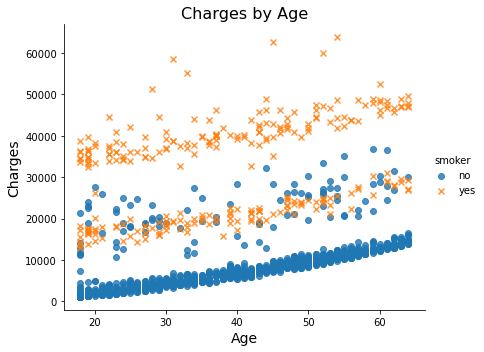

In [121]:
#importing seaborn
import seaborn as sns


#lm plot hue by smoker status
sns.lmplot(x="age", y="charges", hue = "smoker", markers = ["o", "x"], 
           fit_reg=False, data=data, height =4.5, aspect =1.3)
plt.title("Charges by Age", fontsize = 16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Charges", fontsize=14)

As you can see we have three distinct lines in our charges data. The bottom most line is made up entirely of those who do not smoke, while the highest line consists entirely of those that do smoke. Additionally, to be noted, the top line has y-values almost exclusively over 31119.86, which as you will see below, in the boxplot, is the cutoff for our outliers.

This could mean several things: 
1. We could actually have different populations that we are looking at. 
    - Smokers and Non-smokers may need to be considered seperate populations.
2. There are interactions between our variables that need more exploring.
    - There could be factors that influnce insurance cost outside of the variables that were measured, or could be interactions between the variables we have collected. Possible interactions include age:smoker, age:bmi, age:children, and bmi:children.
    - a nonparametric model or machine learning model might be useful in identifying what seperates these groups or what interactions are influencing "charges" the most.

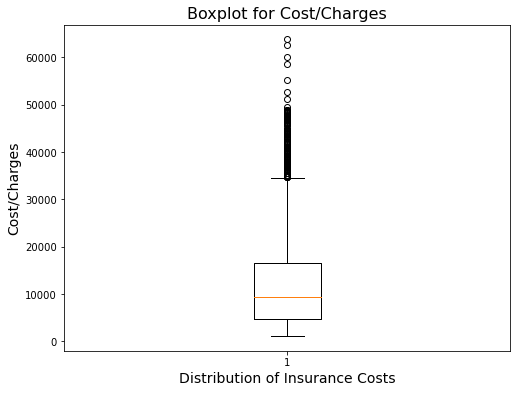

The cutoff for outliers is 31119.86


In [92]:
#creating boxplot to look for outliers
figure(figsize =(8,6))
plt.boxplot(data["charges"])
plt.title("Boxplot for Cost/Charges", fontsize = 16)
plt.xlabel("Distribution of Insurance Costs", fontsize = 14)
plt.ylabel("Cost/Charges", fontsize=14)
plt.show()

#determining IQR
from scipy.stats import iqr

IQR = iqr(data["charges"])

#determining cutoff value for outliers
outlier = round((1.5 * IQR) + np.mean(data["charges"]), 2)

print("The cutoff for outliers is " + str(outlier))

As we can see from the boxplot above, we have a significant number of outliers. All datapoints above about $31,119.86 are considered outliers. If we isolate this data we can see that these are almost exlusively those who said they smoked.

In [94]:
outliers = data.loc[data["charges"] > 31119.86]["smoker"]
print(outliers.value_counts())

yes    150
no       6
Name: smoker, dtype: int64


We have a total of 156 outliers, and of that 156, 150 identified as smokers. 

For future research, this might indicate that rather than treating those who smoke and those who dont as part of a single population, you might want to consider treating them as seperate populations for future analysis and modeling purposes.